# Лабораторная работа №5. Классификация <br>
Работа выполнена студентом гр. 4217 Мазориевым У.А. <br>
Вариант №10

##**Цель работы**
 <br>
Изучение алгоритмов и методов классификации на практике.

### **Часть 1**

Для начала файл считывается с помощь и проводится предварительный анализ данных

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/5gym_churn.csv')
df

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,1,1,0,1,12,0,33,2.406023,12.0,8,2.284497,2.349070,0
3996,0,1,0,0,1,1,1,29,68.883764,1.0,1,1.277168,0.292859,1
3997,1,1,1,1,1,12,0,28,78.250542,11.0,2,2.786146,2.831439,0
3998,0,1,1,1,1,6,0,32,61.912657,5.0,3,1.630108,1.596237,0


 Файл содержит информацию о клиентах фитнес клуба:
 1. Пол
 2. Близкое расположение
 3. Сотрудник компании партнера
 4. По промо друзей
 5. Указан ли телефон
 6. Длительность текущего абонемента
 7. Посещение групповых занятий
 8. Возраст
 9. Средние траты на дополнительные услуги
 10. Количество месяцев до окончания абонемента
 11. время с момента первого обращения в фитнесцентр (в месяцах)
 12. средняя частота посещений в неделю за все время с начала действия абонемента
 13. средняя частота посещений в неделю за предыдущий месяц
 14. Churn – факт ухода из клуба


 Далее датасет проверяется на наличие дубликатов, видно, что файл не имеет пропусков, а также все типы данных верно присвоены, так как в датасете только числовые значения, проверять его на неявные дубликаты нет смысла.

In [ ]:
df.info()
print(df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

Дубликатов не нашлось, все типы данных присвоены правильно, далее выбирается целевая переменная, которая не будет включаться в модель наших данных. В качестве целевой переменной был выбран факт ухода из клуба клиента.

In [ ]:
target_values = input()
target = df[target_values]
features = df.drop(columns=[target_values])

Churn


Далее строится диаграмма матриц рассеивания с разделением по цветам по значениями целевой переменной

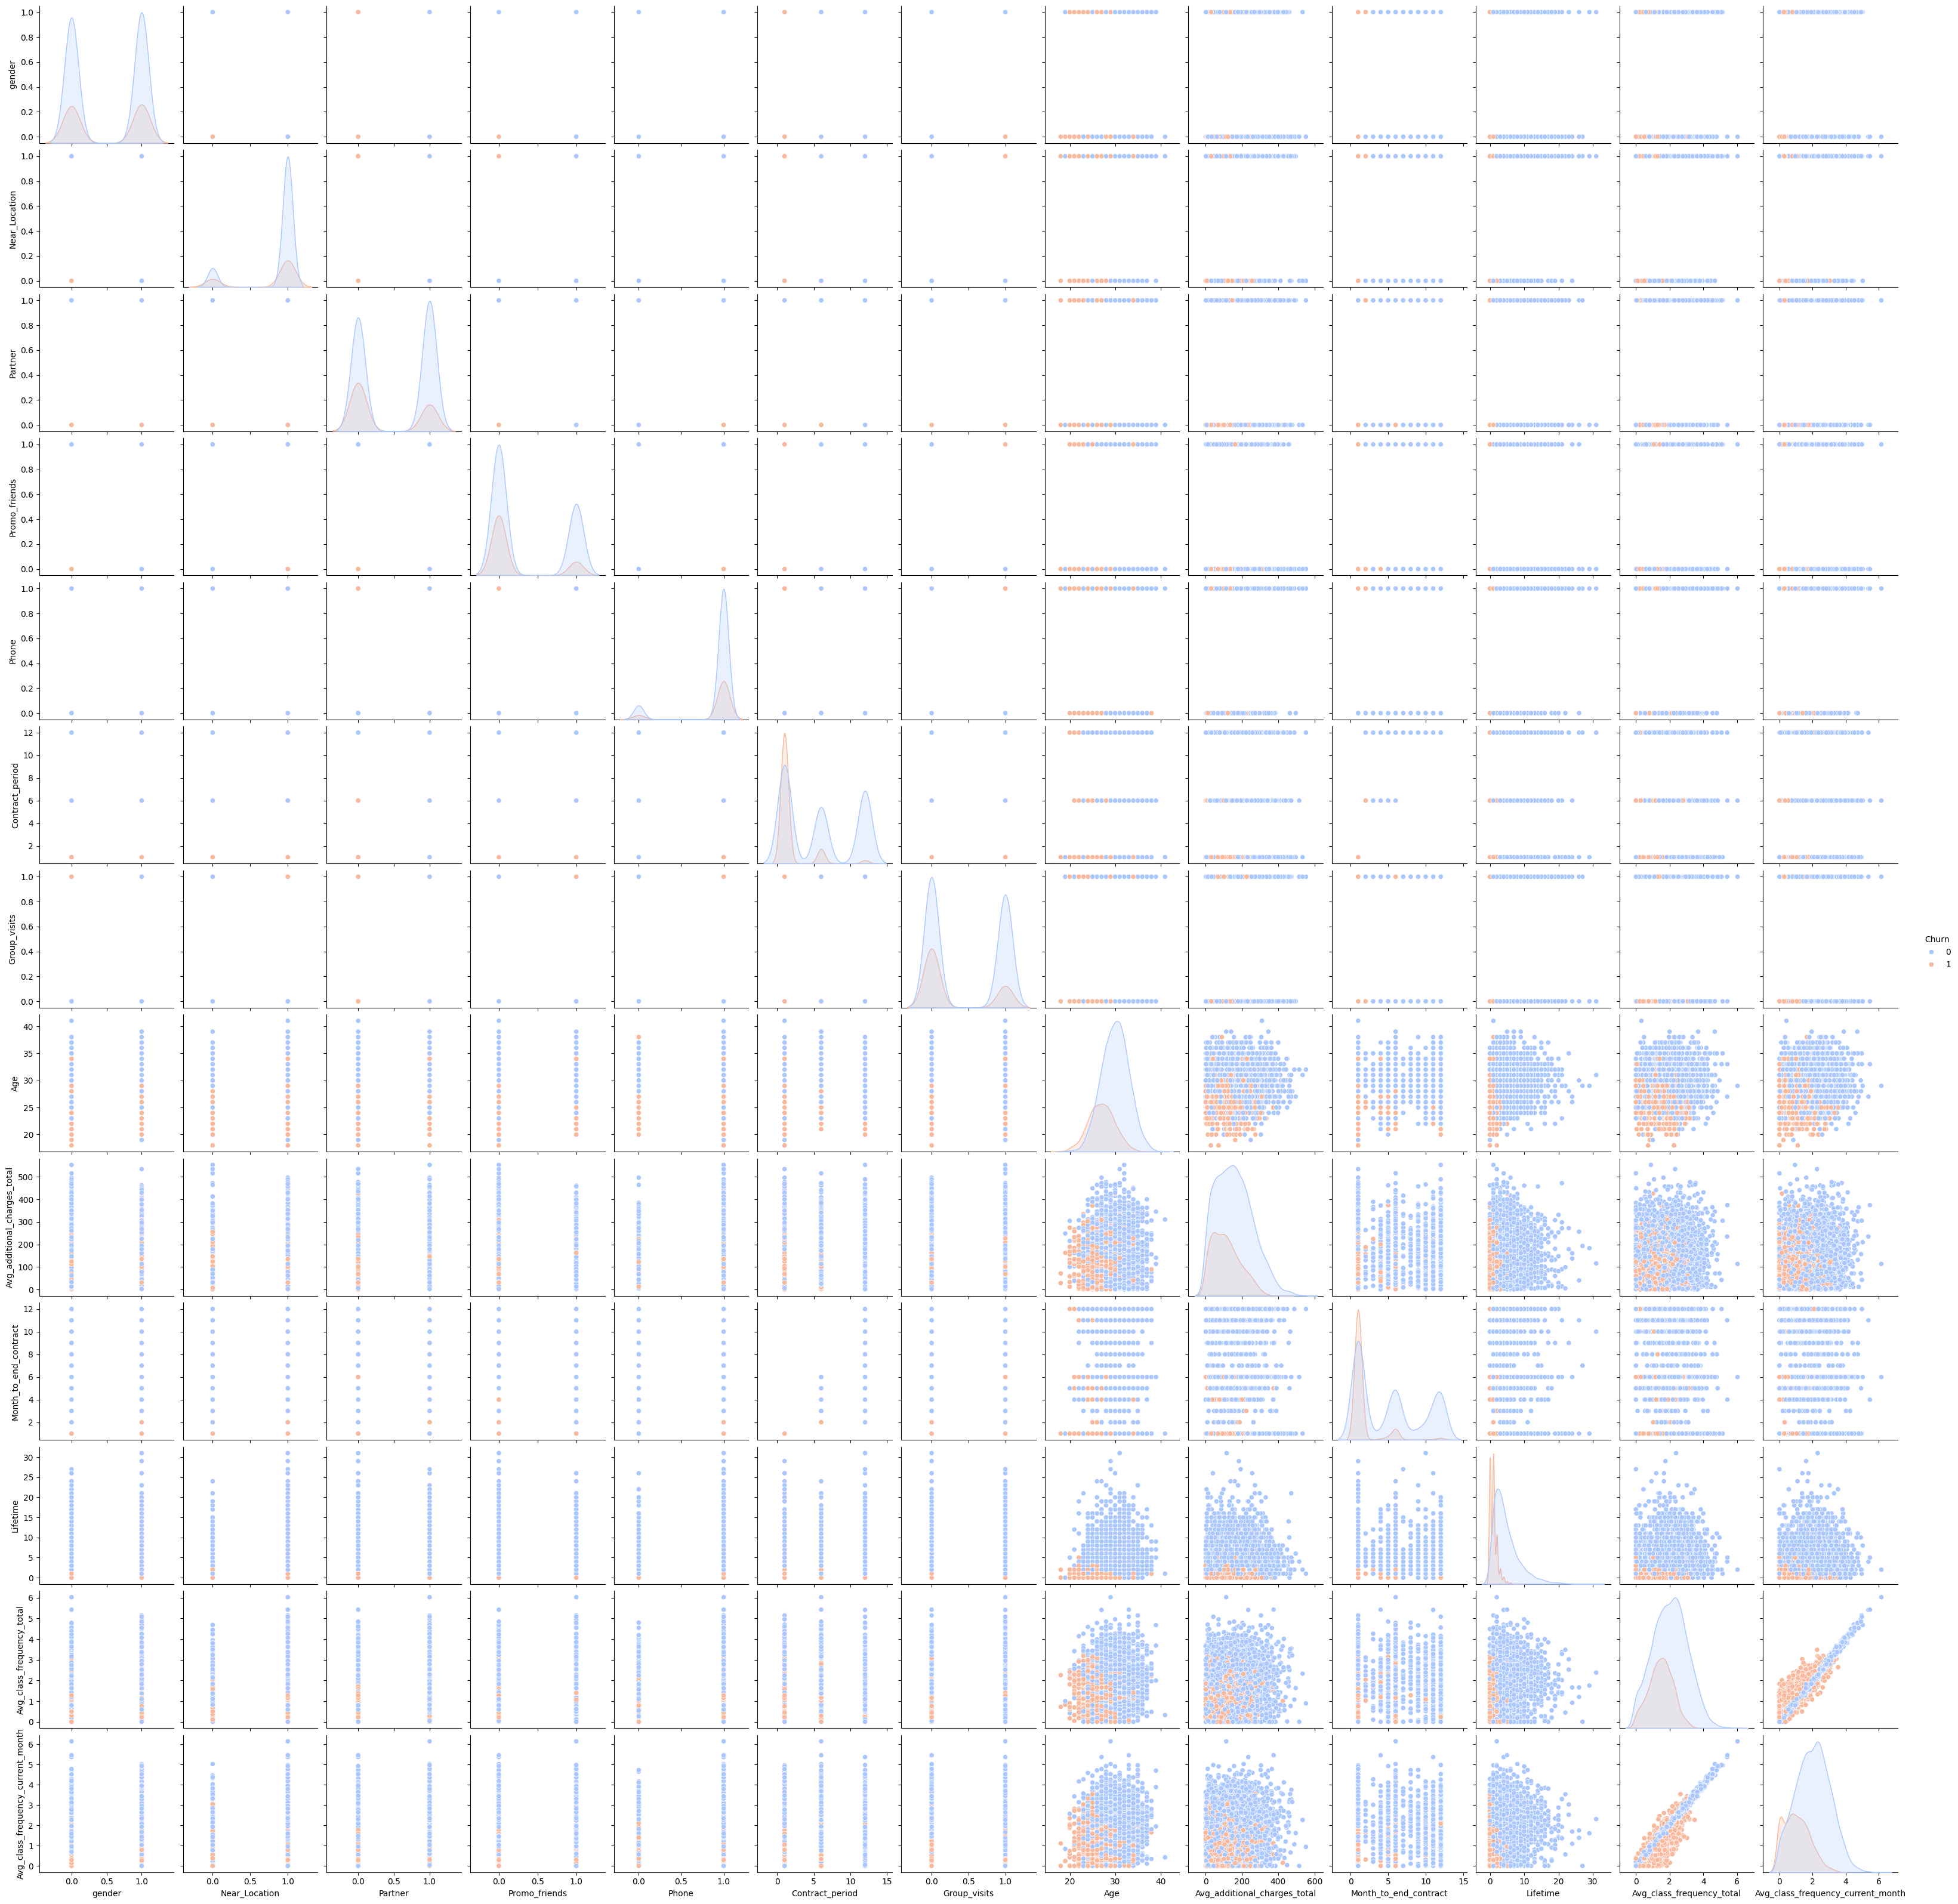

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df, hue=target_values, palette='coolwarm')
plt.show()

Матрица диаграмм рассеяния показала связь двух параметров, а также пренадлежность данной точки к факту ухода клиента из клуба. На матрице диаграмм рассеивания не было видно закономерности, было очень интересно как сработают модели.
<BR>

Далее данные делятся на тренировочную и тестовую выборку  и стандартизируются с помощью StandartScaler

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=0)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Далее разрабатываются модели методами:
- метод knn
- дерево решений
- логистическая регрессия
- случайный лес.
Для начала импортируются нужные модули из библиотеки sklearn, после модели обучаются на тренировочной выборке


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
knn_pred = knn.predict(X_test_scaled)

# Дерево решений
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train_scaled, y_train)
dt_pred = dt.predict(X_test_scaled)

# Логистическая регрессия
lr = LogisticRegression(random_state=0)
lr.fit(X_train_scaled, y_train)
lr_pred = lr.predict(X_test_scaled)

# Случайный лес
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train_scaled, y_train)
rf_pred = rf.predict(X_test_scaled)



Далее для оценки работы моделей считаются метрики такие как:
- Accuracy (Доля правильных предсказаний) - если 0, то модель предсказывает все неправильно если 1, то модель идеальна.
- Precision (Точность) - Доля истинных срабатываний от общего количества срабатываний (TP/TP+FP)
- Recall  (Полнота) - Доля истинных объектов 1 класса (TP/TP+FN)  
- Balanced accuracy (Сбалансированная точность) - Среднее арифметическое между полнотой для положительного класса (Recall) и полнотой для отрицательного класса.
- F1 score (Среднее гармоничное) - Объединение Precision и Recall

Импортируются нужные модули для подсчетам метрик, создается функция, которая на вход принимает модель и две выборки, в результате функция выводит подсчитанные метрики для модели.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, balanced_accuracy_score

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"Метрики для модели {type(model).__name__}:")
    print(f"Accuracy: {round(accuracy,2)}")
    print(f"Precision: {round(precision,2)}")
    print(f"Recall: {round(recall,):}")
    print(f"Balanced Accuracy: {round(balanced_accuracy,2)}")
    print(f"F1 Score: {round(f1,2)}")
    print()


evaluate_model(knn, X_test_scaled, y_test)
evaluate_model(dt, X_test_scaled, y_test)
evaluate_model(lr, X_test_scaled, y_test)
evaluate_model(rf, X_test_scaled, y_test)


Метрики для модели KNeighborsClassifier:
Accuracy: 0.88
Precision: 0.77
Recall: 1
Balanced Accuracy: 0.84
F1 Score: 0.77

Метрики для модели DecisionTreeClassifier:
Accuracy: 0.89
Precision: 0.78
Recall: 1
Balanced Accuracy: 0.86
F1 Score: 0.79

Метрики для модели LogisticRegression:
Accuracy: 0.93
Precision: 0.86
Recall: 1
Balanced Accuracy: 0.9
F1 Score: 0.85

Метрики для модели RandomForestClassifier:
Accuracy: 0.92
Precision: 0.86
Recall: 1
Balanced Accuracy: 0.88
F1 Score: 0.83



Логистическая регрессия демонстрирует наилучшие результаты по всем метрикам, включая точность (Accuracy) и F1 Score, что свидетельствует о её эффективности в выявлении уходящих клиентов (Recall = 1) и минимизации ложных срабатываний (высокая Precision).

Случайный лес и решающее дерево показывают схожие результаты. Несмотря на высокие показатели, эти модели слегка уступают логистической регрессии в точности и F1 Score.

Метрики KNeighborsClassifier значительно ниже по сравнению с другими моделями. Это может указывать на наличие проблем с переобучением или недостаточной экстраполяцией для новых данных.

Далее строится матрица ошибок для каждой модели, которая показывает:
- True Positive (TP) – Надо предсказать 1 предсказано 1
- True Negative(TN)- Надо предсказать 0 предсказано 0
- False Positive(FP) - Надо предсказать 0 предсказано 1
- False Negative(FN) - Надо предсказать 1 предсказано 0

Также используется библиотеки matplotlib и seaborn для визуализации матрицы ошибок.








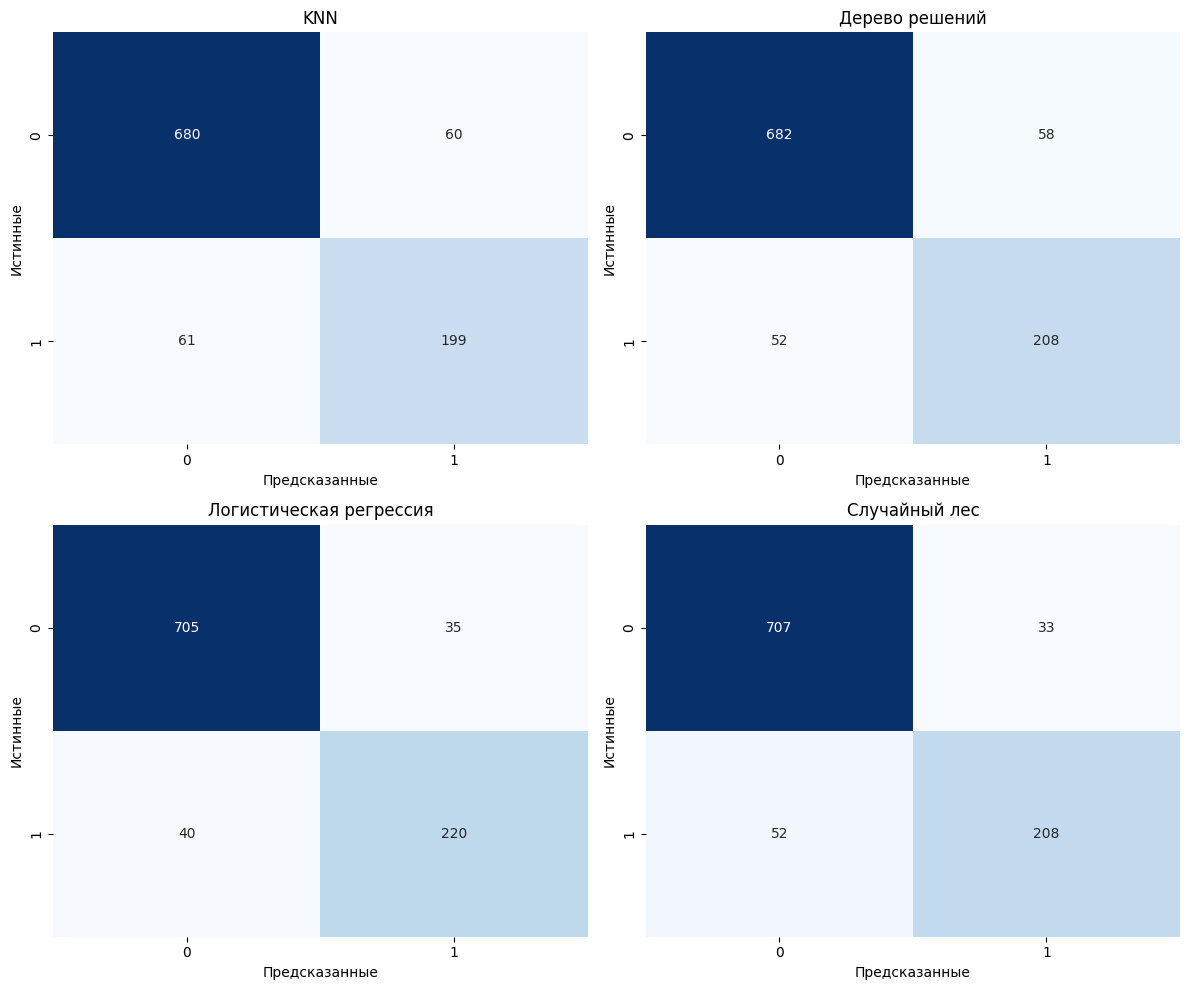

In [ ]:
from sklearn.metrics import confusion_matrix

fig, axes = plt.subplots(2, 2, figsize=(12, 10))


cm_knn = confusion_matrix(y_test, knn_pred)
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[0, 0])
axes[0, 0].set_title("KNN")
axes[0, 0].set_xlabel("Предсказанные")
axes[0, 0].set_ylabel("Истинные")

cm_dt = confusion_matrix(y_test, dt_pred)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[0, 1])
axes[0, 1].set_title("Дерево решений")
axes[0, 1].set_xlabel("Предсказанные")
axes[0, 1].set_ylabel("Истинные")

cm_lr = confusion_matrix(y_test, lr_pred)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[1, 0])
axes[1, 0].set_title("Логистическая регрессия")
axes[1, 0].set_xlabel("Предсказанные")
axes[1, 0].set_ylabel("Истинные")

cm_rf = confusion_matrix(y_test, rf_pred)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[1, 1])
axes[1, 1].set_title("Случайный лес")
axes[1, 1].set_xlabel("Предсказанные")
axes[1, 1].set_ylabel("Истинные")

plt.tight_layout()
plt.show()


Логистическая регрессия демонстрирует наибольшую эффективность в данной задаче, характеризуясь высокой точностью предсказаний и низкими показателями ложных срабатываний.

Случайный лес и дерево решений имеют схожие результаты, обеспечивая хороший баланс между истинными положительными и ложными положительными результатами.

KNN показывает наибольшее количество ложных отрицательных результатов, что свидетельствует о его менее эффективном выявлении уходящих клиентов по сравнению с другими моделями.

Фитнес клубу стоит определиться с тактикой, которой они хотят придерживаться.

После строится Roc-кривые для 4 моделей.
ROC-кривая представляет собой график, который показывает изменение отношения между верными положительными (True Positive Rate) и ложными положительными (False Positive Rate) классификациями в зависимости от изменения порога классификации

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


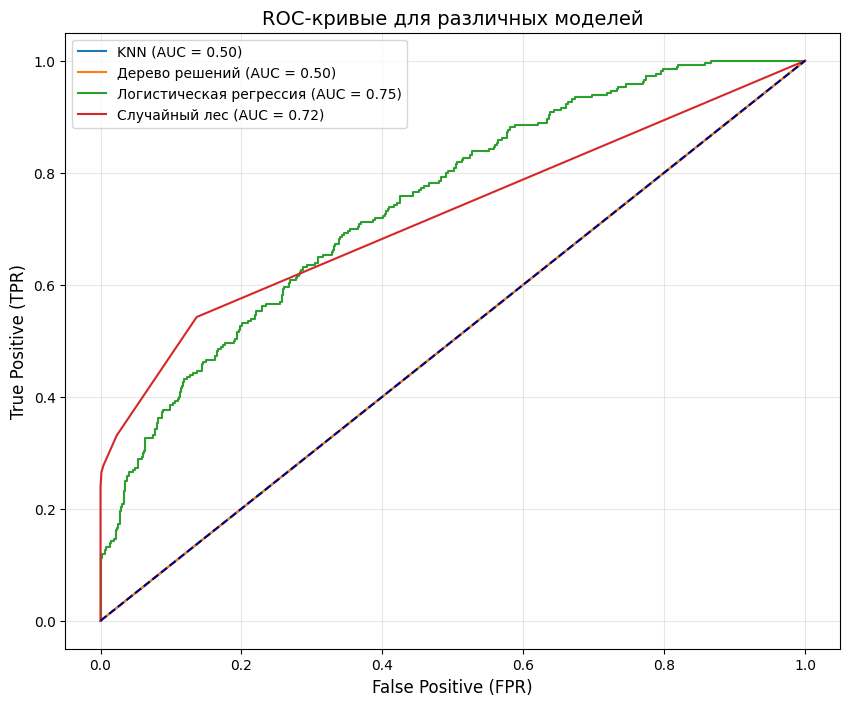

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

y_probs_1 = knn.predict_proba(X_test)[:, 1]
y_probs_2 = dt.predict_proba(X_test)[:, 1]
y_probs_3 = lr.predict_proba(X_test)[:, 1]
y_probs_4 = rf.predict_proba(X_test)[:, 1]

y_true = y_test

models = {
    "KNN": y_probs_1,
    "Дерево решений": y_probs_2,
    "Логистическая регрессия": y_probs_3,
    "Случайный лес": y_probs_4,
}

plt.figure(figsize=(10, 8))

for name, y_probs in models.items():
    fpr, tpr, _ = roc_curve(y_true, y_probs)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], color="navy", linestyle="--")

plt.title("ROC-кривые для различных моделей", fontsize=14)
plt.xlabel("False Positive (FPR)", fontsize=12)
plt.ylabel("True Positive (TPR)", fontsize=12)
plt.legend(loc="upper left", fontsize=10)
plt.grid(alpha=0.3)
plt.show()


AUC, равный 0.50, указывает на то, что происходит случайное угадывание.

Логистическая регрессия является наиболее эффективным методом среди рассмотренных, что делает её фаворитом в выборе модели для  данной задачи.

KNN и дерево решений демонстрируют низкую эффективность, что делает их использование нецелесообразным.

Случайный лес показывает слегка меньшие результаты по сравнению с логистической регрессией, но всё же обладает потенциалом для применения.

Исходя из результатов выше, можно сделать вывод, что для данной задачи стоит взять такие модели, как Логистическая регрессия или случайный лес, другие модели, лишь случайно угадывают, как какой группе относится целевая переменная.

### Вывод



В ходе лабораторной работы были рассмотрены и применены различные алгоритмы классификации для задачи предсказания ухода клиентов из фитнес-клуба. После предварительного анализа данных и их стандартизации была проведена классификация с использованием четырех моделей: K ближайших соседей (KNN), дерева решений, логистической регрессии и случайного леса. Каждая из моделей продемонстрировала свои уникальные результаты, что позволило провести сравнительный анализ их эффективности.

Логистическая регрессия оказалась наиболее эффективным методом, обеспечивая высокую точность предсказаний и хорошую способность к различению классов. Случайный лес показал удовлетворительные результаты, но несколько уступал логистической регрессии по ключевым метрикам.

KNN и дерево решений продемонстрировали наименьшую эффективность, что указывает на их нецелесообразность в контексте данной задачи. Оба метода имели низкие значения AUC, что соответствует случайному угадыванию.

Выбор модели для классификации будет напрямую зависеть от стратегий и целей фитнес-клуба, так как каждая модель имеет свои сильные и слабые стороны.

# Дополнительное задание
Осуществить подбор оптимальных параметров с помощью GridSearchCV для дерева решений.
Сравнить качество модели для подобранных параметров и любых других.


Описание кода

Для начала ипортируется нужнный модуль GridSearchCV, которые оценивает модель по разным гиперпараметрам и подбирает из них самые лучшие. После выбираются признаки по которым будем подобрана наша "идеальная и неповторимая" модель
- criterion помогает выбирать наиболее информативные признаки.
- max_depth контролирует сложность модели.
- min_samples_split и min_samples_leaf регулируют минимальные требования к количеству данных, чтобы предотвратить излишнее деление и стабилизировать дерево.

Далее идет подсчет метрик через ранюю созданную функцию

In [ ]:
from sklearn.model_selection import  GridSearchCV

dt_optimized = DecisionTreeClassifier(random_state=0)

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy',
                           verbose=1)

grid_search.fit(X_train_scaled, y_train)
dt_optimized = grid_search.best_estimator_


print('Без использования Grid')
evaluate_model(dt, X_test_scaled, y_test)

print("С использованием")
evaluate_model(dt_optimized, X_test_scaled, y_test)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Без использования Grid
Метрики для модели DecisionTreeClassifier:
Accuracy: 0.89
Precision: 0.78
Recall: 1
Balanced Accuracy: 0.86
F1 Score: 0.79

С использованием
Метрики для модели DecisionTreeClassifier:
Accuracy: 0.9
Precision: 0.82
Recall: 1
Balanced Accuracy: 0.86
F1 Score: 0.8



Результаты показали, что подбор гиперпараметров с использованием GridSearchCV не дает сильного роста в метриках модели, это может свидетельствовать о том, что базовые параметры DecisionTreeClassifier уже достаточно хорошо подобраны.